## Things to keep in mind: 

We want to find a way to group pitchers/pitches, so we don't have a computational nightmare: 

In [15]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
baseball_df = pd.read_pickle("data/baseball_data.pkl")

In [3]:
baseball_df.head()

,gameid,GameDate,Date,Time,ab,pitchnum,inning,teambat,balls,strikes,...,hometeam_id,Home,awayteam_id,Visitor,venue_id,venue_name,game_start,game_number,visscore,homscore
0,2021/04/01/pitmlb-chnmlb-1,2021-04-01 13:20:00,2021-04-01,13:20:00,1,1,1.0,0,0.0,0.0,...,112,Chicago Cubs,134,Pittsburgh Pirates,17,Wrigley Field,True,1,0.0,0.0
1,2021/04/01/pitmlb-chnmlb-1,2021-04-01 13:20:00,2021-04-01,13:20:00,1,2,1.0,0,1.0,0.0,...,112,Chicago Cubs,134,Pittsburgh Pirates,17,Wrigley Field,False,1,0.0,0.0
2,2021/04/01/pitmlb-chnmlb-1,2021-04-01 13:20:00,2021-04-01,13:20:00,1,3,1.0,0,1.0,1.0,...,112,Chicago Cubs,134,Pittsburgh Pirates,17,Wrigley Field,False,1,0.0,0.0
3,2021/04/01/pitmlb-chnmlb-1,2021-04-01 13:20:00,2021-04-01,13:20:00,1,4,1.0,0,2.0,1.0,...,112,Chicago Cubs,134,Pittsburgh Pirates,17,Wrigley Field,False,1,0.0,0.0
4,2021/04/01/pitmlb-chnmlb-1,2021-04-01 13:20:00,2021-04-01,13:20:00,1,5,1.0,0,3.0,1.0,...,112,Chicago Cubs,134,Pittsburgh Pirates,17,Wrigley Field,False,1,0.0,0.0


In [4]:
baseball_df.columns

Index(['gameid', 'GameDate', 'Date', 'Time', 'ab', 'pitchnum', 'inning',
       'teambat', 'balls', 'strikes', 'outs', 'pitcher', 'pitcherthrows',
       'batter', 'batterside', 'pitchresult', 'pitchresult_desc', 'eventtype',
       'pitchname', 'pitchname_desc', 'spinrate', 'relspeed', 'horzbreak',
       'inducedvertbreak', 'platelocside', 'platelocheight', 'hometeam_id',
       'Home', 'awayteam_id', 'Visitor', 'venue_id', 'venue_name',
       'game_start', 'game_number', 'visscore', 'homscore'],
      dtype='object')

In [5]:
baseball_df['eventtype'].unique()

array(['ball', 'foul', 'walk', 'home_run', 'field_out', 'called_strike',
       'strikeout', 'blocked_ball', 'swinging_strike', 'force_out',
       'double', 'sac_fly', 'single', 'foul_bunt', 'sac_bunt',
       'field_error', 'stolen_base_2b', 'stolen_base_3b', 'hit_by_pitch',
       'foul_tip', 'wild_pitch', 'swinging_strike_blocked',
       'grounded_into_double_play', 'double_play', 'defensive_indiff',
       'triple', 'fielders_choice_out', 'missed_bunt', 'passed_ball',
       'catcher_interf', 'caught_stealing_2b', 'fielders_choice',
       'caught_stealing_3b', 'sac_fly_double_play',
       'strikeout_double_play', 'pitchout', 'balk', 'bunt_foul_tip',
       'triple_play', 'sac_bunt_double_play',
       'pickoff_caught_stealing_2b', 'intent_walk',
       'caught_stealing_home', 'foul_pitchout', nan, 'other_advance',
       'stolen_base_home'], dtype=object)

## Trying to Create Groupings for Pitchers

### Option 1: Grouping by Velocity/SpinRate

In [6]:
# https://rocklandpeakperformance.com/baseball-pitches-a-comprehensive-guide/#:~:text=In%20major%20league%20baseball%2C%20a,high%2080's%20to%20100%2B%20MPH.

# I don't know what good velocities are for these bins, have to do some more research

# Create velocity bins
baseball_df['velocity_group'] = pd.cut(
    baseball_df['relspeed'], 
    bins=[0, 85, 92, float('inf')], 
    labels=['Low Velocity', 'Medium Velocity', 'High Velocity']
)

# Create spin rate bins
baseball_df['spinrate_group'] = pd.cut(
    baseball_df['spinrate'], 
    bins=[0, 2000, 2500, float('inf')], 
    labels=['Low Spin', 'Medium Spin', 'High Spin']
)

baseball_df['spinrate_group'].dtype
baseball_df['velocity_group'].dtype
# baseball_df.head()

# baseball_df['velocity_group'] = baseball_df['velocity_group'].fillna('Unknown')
# baseball_df['spinrate_group'] = baseball_df['spinrate_group'].fillna('Unknown')

# # Group pitchers based on both criteria
baseball_df['pitcher_group'] = baseball_df['velocity_group'].astype(str) + ' / ' + baseball_df['spinrate_group'].astype(str)
# 
baseball_df[['pitcher','pitchname', 'velocity_group', 'spinrate_group', 'pitcher_group']]
# baseball_df[['pitcher', 'velocity_group', 'spinrate_group', 'pitcher_group']].sort_values(by='pitcher')

,pitcher,pitchname,velocity_group,spinrate_group,pitcher_group
0,"Hendricks, Kyle",FF,Medium Velocity,High Spin,Medium Velocity / High Spin
1,"Hendricks, Kyle",FF,Medium Velocity,Low Spin,Medium Velocity / Low Spin
2,"Hendricks, Kyle",FF,Medium Velocity,Low Spin,Medium Velocity / Low Spin
3,"Hendricks, Kyle",FF,Medium Velocity,Low Spin,Medium Velocity / Low Spin
4,"Hendricks, Kyle",FF,Medium Velocity,Low Spin,Medium Velocity / Low Spin
...,...,...,...,...,...
706904,"Pivetta, Nick",FF,High Velocity,Medium Spin,High Velocity / Medium Spin
706905,"Pivetta, Nick",KC,Low Velocity,High Spin,Low Velocity / High Spin
706906,"Pivetta, Nick",FF,High Velocity,Medium Spin,High Velocity / Medium Spin
706907,"Pivetta, Nick",FF,High Velocity,Medium Spin,High Velocity / Medium Spin


### Option 2: Getting Proportions of Innings that the pitchers have pitched in  

In [7]:
pitcher_inning_counts = baseball_df.groupby(['pitcher', 'inning']).size().reset_index(name='inning_count')

# Group by pitcher to get total innings pitched for each pitcher
pitcher_total_innings = pitcher_inning_counts.groupby('pitcher')['inning_count'].sum().reset_index(name='total_innings')

# Merge total innings back into the inning counts df
pitcher_inning_proportions = pd.merge(pitcher_inning_counts, pitcher_total_innings, on='pitcher')

# Calculate the proportion of innings pitched for each pitcher in each inning
pitcher_inning_proportions['proportion'] = pitcher_inning_proportions['inning_count'] / pitcher_inning_proportions['total_innings']

# Sort by pitcher and inning
pitcher_inning_proportions = pitcher_inning_proportions.sort_values(by=['pitcher', 'inning'])

pitcher_inning_proportions.head()

,pitcher,inning,inning_count,total_innings,proportion
0,"Abad, Fernando",3.0,10,299,0.033445
1,"Abad, Fernando",4.0,24,299,0.080268
2,"Abad, Fernando",5.0,47,299,0.157191
3,"Abad, Fernando",6.0,73,299,0.244147
4,"Abad, Fernando",7.0,63,299,0.210702


In [8]:
def get_proportion_table(df, pitcher_name):
    # Filter the DataFrame by the specified pitcher name
    pitcher_df = df[df['pitcher'] == pitcher_name]
    
    # Calculate the proportion of innings pitched
    proportion_table = pitcher_df[['inning', 'inning_count', 'total_innings', 'proportion']]
    
    return proportion_table

result = get_proportion_table(pitcher_inning_proportions, 'Burnes, Corbin')
print(result)

     inning  inning_count  total_innings  proportion
727     1.0           450           2594    0.173477
728     2.0           404           2594    0.155744
729     3.0           390           2594    0.150347
730     4.0           423           2594    0.163069
731     5.0           391           2594    0.150732
732     6.0           371           2594    0.143022
733     7.0           101           2594    0.038936
734     8.0            54           2594    0.020817
735     9.0            10           2594    0.003855


In [13]:
def plot_proportion(df, pitcher_name):
    # Get the proportion table for the given pitcher
    proportion_table = get_proportion_table(df, pitcher_name)
    
    plt.figure(figsize=(10, 6))
    plt.plot(proportion_table['inning'], proportion_table['proportion'], marker='o', linestyle='-', color='b', label=f'Proportion of innings - {pitcher_name}')
    
    # Add labels and title
    plt.xlabel('Inning')
    plt.ylabel('Proportion of Innings Pitched')
    plt.title(f'Inning Proportions for {pitcher_name}')
    plt.grid(True)
    plt.legend()
    
    plt.show()

def plot_pmf(df, pitcher_name):
    # Get the proportion table for the given pitcher
    proportion_table = get_proportion_table(df, pitcher_name)
    
    # Plot the PMF (treating the 'proportion' as the PMF values)
    plt.figure(figsize=(10, 6))
    plt.bar(proportion_table['inning'], proportion_table['proportion'], color='b', alpha=0.7)
    
    # Add labels and title
    plt.xlabel('Inning')
    plt.ylabel('Probability')
    plt.title(f'PMF of Inning Proportions for {pitcher_name}')
    plt.grid(True)
    
    # Show the plot
    plt.show()

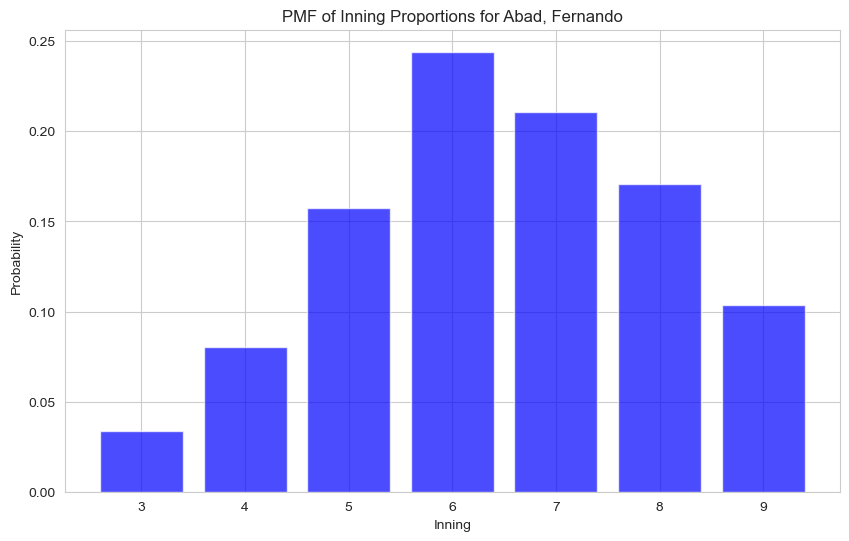

In [14]:
# Example usage
plot_pmf(pitcher_inning_proportions, 'Abad, Fernando')

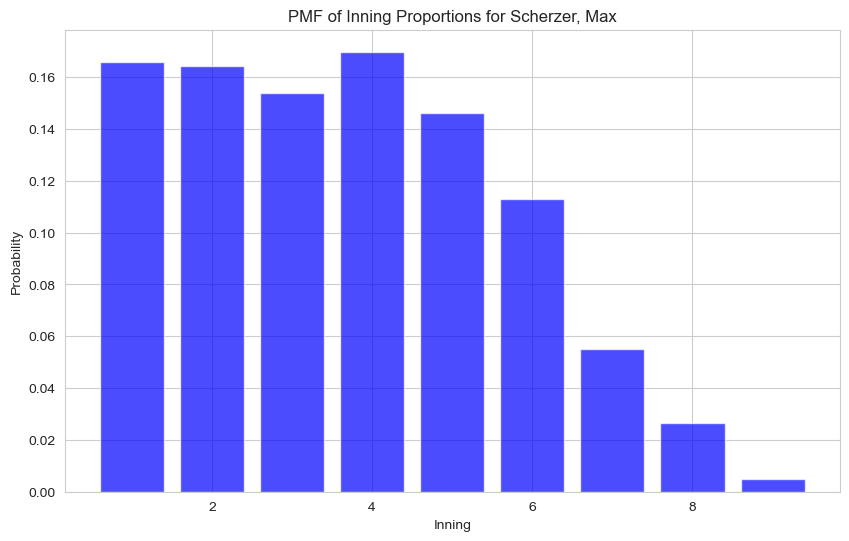

In [17]:
plot_pmf(pitcher_inning_proportions, 'Scherzer, Max')

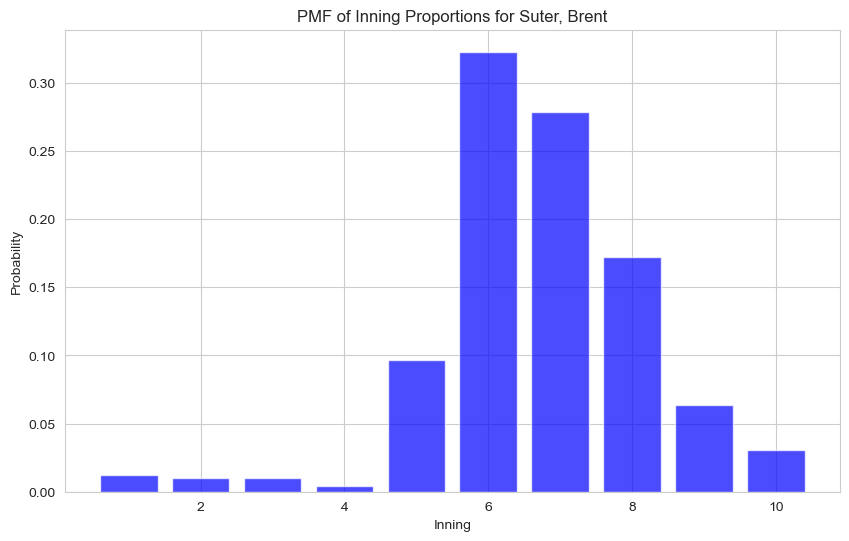

In [16]:
plot_pmf(pitcher_inning_proportions, 'Suter, Brent')

## Creating DataFrames for Different Game Situations

In [11]:
# I don't know if we can get specific game states ___, B__, ... 
# I would try and use the 
outs_0_df = baseball_df[baseball_df['outs'] == 0]
outs_1_df = baseball_df[baseball_df['outs'] == 1]
outs_2_df = baseball_df[baseball_df['outs'] == 2]

In [ ]:
outs_0_df.head(20)